In [1]:
# fastai-specific stuff.
# Import fastai code.
from fastai.vision.all import *

# Set a seed so that the results are the same every time this is run.
set_seed(0, reproducible=True)

# Make one-channel images display in greyscale.
# See https://forums.fast.ai/t/show-image-displays-color-image-for-mnist-sample-dataset/78932/4
# But "Grays" is inverted, so we use "gray" instead.
matplotlib.rc('image', cmap='gray')

In [2]:
# Show what GPU we have.
if torch.cuda.is_available():
    print("Found a GPU:", torch.cuda.get_device_properties(0))
else:
    print("No CUDA.")

Found a GPU: _CudaDeviceProperties(name='NVIDIA GeForce RTX 3060', major=8, minor=6, total_memory=12050MB, multi_processor_count=28)


In [3]:
# fastai-specific
path = untar_data("https://students.cs.calvin.edu/~kk58/images.zip")

In [4]:
# fastai-specific
image_files = get_image_files(path).sorted()

In [5]:
len(image_files)

132

In [6]:
first_img = image_files[0]
last_img = image_files[-1]
print("First image: {c}".format(c = first_img.name))
print("Last image: {c}".format(c = last_img.name))

First image: A01.png
Last image: c21.png


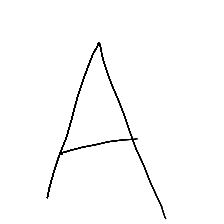

In [7]:
load_image(first_img)

In [8]:
set_seed(333)
image_files = get_image_files(path).sorted().shuffle()

In [9]:
splitter = RandomSplitter(valid_pct=0.2, seed=42)

In [10]:
first_img = image_files[0]
last_img = image_files[-1]
print("First image: {c}".format(c = first_img.name))
print("Last image: {c}".format(c = last_img.name))

First image: b08.png
Last image: C02.png


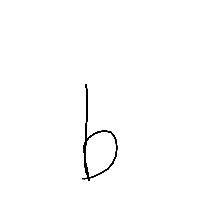

In [11]:
load_image(first_img)

In [12]:
def a_b_or_c(file_name):
    return file_name[0]
    
def get_y(file_path):
    return a_b_or_c(file_path.name)

In [13]:
dblock = DataBlock(blocks    = (ImageBlock, CategoryBlock),
                   get_y     = get_y,
                   splitter  = splitter,
                   item_tfms = Resize(224))

In [14]:
dataloaders = dblock.dataloaders(image_files, batch_size=9, shuffle_fn=lambda idxs: idxs)

In [15]:
batch = dataloaders.train.one_batch()
images_orig, labels = batch
images = images_orig.clone() # make a copy that we can modify later.

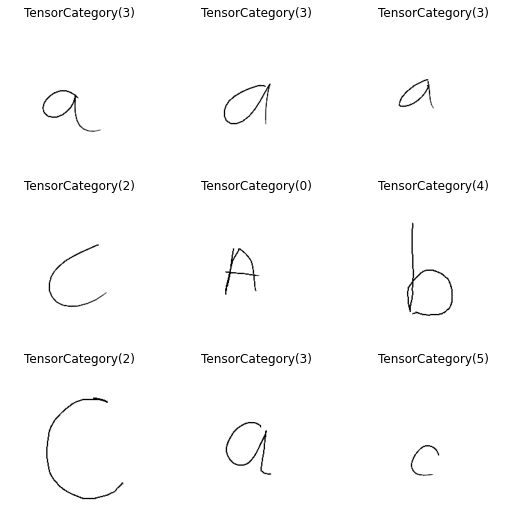

In [16]:
show_image_batch((images, labels))

TensorCategory **0** = "**A**" <br>
TensorCategory **1** = "**B**" <br>
TensorCategory **2** = "**C**" <br>
TensorCategory **3** = "**a**" <br>
TensorCategory **4** = "**b**" <br>
TensorCategory **5** = "**c**" <br>

In [17]:
labels

TensorCategory([3, 3, 3, 2, 0, 4, 2, 3, 5], device='cuda:0')

In [18]:
dataloaders.train.vocab

['A', 'B', 'C', 'a', 'b', 'c']

In [19]:
print("{fileName} is a {aBOrC}".format(fileName = first_img.name, aBOrC = a_b_or_c(first_img.name)))
print("{fileName} is a {aBOrC}".format(fileName = last_img.name, aBOrC = a_b_or_c(last_img.name)))

b08.png is a b
C02.png is a C


In [20]:
labels = []
for i in image_files:
    labels.append(a_b_or_c(i.name))

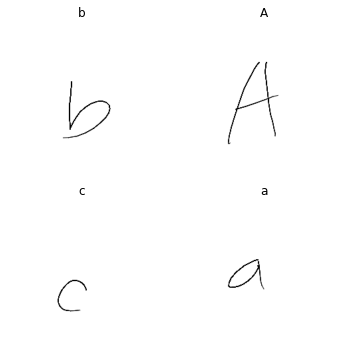

In [21]:
dataloaders = ImageDataLoaders.from_lists(
    # What images to use:
    path=path, fnames=image_files, labels=labels,

    # train-test split parameters:
    # - amount to hold out for validation:
    valid_pct=0.2,
    # - set the seed used for the train-test split (not the training)
    seed=42, 

    # Set batch size
    bs=4,

    # Make all the images the same size.
    item_tfms=Resize(224)
)

# Show what it did:
dataloaders.train.show_batch()

In [22]:
print(dataloaders.train.n, "training images")
print(dataloaders.valid.n, "validation images")

106 training images
26 validation images


epoch,train_loss,valid_loss,accuracy,error_rate,time
0,2.408000,0.771014,0.730769,0.269231,00:02


epoch,train_loss,valid_loss,accuracy,error_rate,time
0,1.265564,0.947438,0.692308,0.307692,00:01
1,1.006682,0.590699,0.846154,0.153846,00:01
2,0.886071,0.357930,0.769231,0.230769,00:01
3,0.780682,0.392332,0.846154,0.153846,00:01
4,0.712094,0.328821,0.846154,0.153846,00:01
5,0.653752,0.304209,0.846154,0.153846,00:01
6,0.587671,0.119290,0.961538,0.038462,00:01
7,0.500546,0.174307,0.961538,0.038462,00:01
8,0.436608,0.174602,0.923077,0.076923,00:01
9,0.409361,0.112228,1.000000,0.000000,00:01


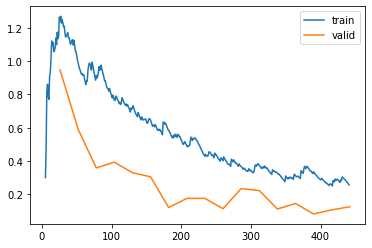

In [23]:
# fastai-specific
learn = vision_learner(
    dls=dataloaders,
    arch=resnet18,
    metrics=[accuracy, error_rate]
)
learn.fine_tune(epochs=17)
learn.recorder.plot_loss()

This letter is a: b.
Probabilities: TensorBase([1.3195e-05, 1.0626e-06, 1.2641e-07, 1.1355e-06, 9.9992e-01, 6.1790e-05])


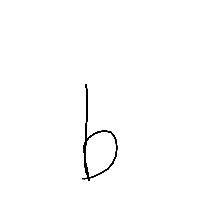

In [24]:
with learn.no_bar():
    prediction, _, probs = learn.predict(PILImage.create(first_img))
print(f"This letter is a: {prediction}.")
print(f"Probabilities: {probs}")
load_image(first_img)

In [25]:
with learn.no_bar():
    for i in range(len(image_files)):
        prediction, _, probs = learn.predict(PILImage.create(image_files[i]))
        print(f"This letter is a: {prediction}.")
        load_image(image_files[i])

This letter is a: b.
This letter is a: b.
This letter is a: B.
This letter is a: C.
This letter is a: B.
This letter is a: c.
This letter is a: a.
This letter is a: c.
This letter is a: b.
This letter is a: A.
This letter is a: A.
This letter is a: a.
This letter is a: c.
This letter is a: C.
This letter is a: c.
This letter is a: c.
This letter is a: a.
This letter is a: b.
This letter is a: c.
This letter is a: a.
This letter is a: B.
This letter is a: b.
This letter is a: a.
This letter is a: b.
This letter is a: a.
This letter is a: C.
This letter is a: c.
This letter is a: C.
This letter is a: A.
This letter is a: B.
This letter is a: C.
This letter is a: c.
This letter is a: b.
This letter is a: b.
This letter is a: c.
This letter is a: A.
This letter is a: A.
This letter is a: b.
This letter is a: b.
This letter is a: a.
This letter is a: a.
This letter is a: a.
This letter is a: B.
This letter is a: a.
This letter is a: A.
This letter is a: C.
This letter is a: C.
This letter i

This letter is a: C.
Probabilities: TensorBase([5.0943e-06, 5.4341e-05, 9.9484e-01, 1.3889e-04, 2.9987e-05, 4.9295e-03])


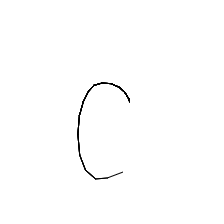

In [26]:
with learn.no_bar():
    prediction, _, probs = learn.predict(PILImage.create(last_img))
print(f"This letter is a: {prediction}.")
print(f"Probabilities: {probs}")
load_image(last_img)

In [27]:
sample_images = random.sample(image_files, k=50)

In [28]:
num_correct = 0
for path in sample_images:
    with learn.no_bar():
        prediction, _, _ = learn.predict(PILImage.create(path))
    if prediction == a_b_or_c(path.name):
        num_correct+=1
num_correct/len(sample_images)

1.0

1. How accurate is the classifier overall?
    - **It is 100% accurate**

2. Which letter is it most successful at classifying? Give an example of a correctly classified image (show a specific image file and its classification).
    - **A**

This letter is a: A.
Probabilities: TensorBase([9.9931e-01, 1.2839e-04, 1.8836e-06, 2.1686e-04, 1.2735e-06, 3.4418e-04])


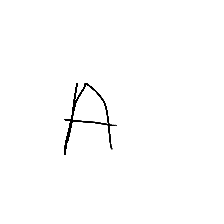

In [29]:
with learn.no_bar():
    prediction, _, probs = learn.predict(PILImage.create(image_files[10]))
print(f"This letter is a: {prediction}.")
print(f"Probabilities: {probs}")
load_image(image_files[10])

3. What mistakes does it make most frequently? Give an example of a mistake (show a specific image file and its classification).
    - **I am not sure because the dataset was too accurate.**

4. For the previous 3 questions, any ideas about why?
    - **I think that the epochs was set so that the training validation step found a pretty close to perfect fit.**

5. Suppose someone else gave you one of their images. How likely do you think your classifier would be to get it right? report your answer in terms of a percentage, either overall or by letter.
    - **I think that if it was an image of "ABC" or "abc", that the possibility would be about the same in the range of ~98%. However, the dataset did contain a lot of data that was neat in handwriting so any messy handwriting might be harder to classify.**

6. What choices did you have to make in the process of collecting data, processing it, and analyzing the results?
    - **I asked people to write specific letters, which in doing so, they took their time to consciously write each letter.** <br>
    - What are one or two choices that you could have made differently?
        - **I think if I had asked people to write words or sentences, and then take out the letters, the data would contain better information to train on.**
    - What do you expect would be different if you made that different choice?
        - **I think that the data would have more to train on and in the end be more accurate in labeling**